# SPRINT 04 TASCA M4 T02

Visualització gràfica de múltiples variables.



#  Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.

->03 EXAMINING DATA

__HECHO__


# Exercici 2
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

->PRE-PROCESSING-DATA/movies.dat


 Important

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [67]:
import pandas as pd

# Cargo los datos de archivo con el comando pd.read_csv()
movies = pd.read_csv('231125 movies_Tabla_TASCA_M4_T02_02.dat', sep='::', 
                     header=None, names=['ID', 'Título/Año', 'Género'], encoding='latin1', engine='python')
# Con sep='::' le indico que el separador de columnas es ::
# Con header=None le digo que no hay una fíla que lleve los nombres de las columnas
# Con names=[]: Le doy los nombres que quiero que tengan las columnas.
# Con encoding='latin1 le indico que la codificación es latin1 (si no lo pongo me dice que no es utf-8)
# El engine='python lo añado porque me aparecía una alarma, y Chat GPT me recomienda que lo incorpore
# Con engine='python se evitan problemas relacionados con la interpretación de caracteres especiales

movies

,ID,Título/Año,Género
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


### SEPARAR TÍTULO Y AÑO
Mediante .str.extract() y unas insutrucciones determinadas para que reconozca númerno de caracteres y años que van entre paréntesis.

In [68]:
movies[['Título', 'Año']] = movies['Título/Año'].str.extract(r'(.*) \((\d{4})\)', expand=True)
# str.extract coge la columna 'Título/Año' y la separa en dos  segun la siguiente instrucción
# Con r'(.*): a r al principio de la cadena indica que es una cadena de caracteres de longitud la que sea.
# (.*): Captura cualquier cosa (cualquier número de caracteres) y lo asigna a la primera columna ('Título').
# El número de caracteres capturado termina cuando se encuentra con la barra invertida "\"
# \( \): Encierra el año entre paréntesis. Los paréntesis deben escaparse con \ porque tienen un significado especial en expresiones regulares.
# (\d{4}): Captura exactamente cuatro dígitos (el año) y lo asigna a la segunda columna ('Año').
# Con expand=True le indico que separe cada resultado en una columna. 
# Si no le doy la instrucción expand=True me devolvería los datos en forma de lista

movies

,ID,Título/Año,Género,Título,Año
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,Meet the Parents,2000
3879,3949,Requiem for a Dream (2000),Drama,Requiem for a Dream,2000
3880,3950,Tigerland (2000),Drama,Tigerland,2000
3881,3951,Two Family House (2000),Drama,Two Family House,2000


### SELECCIONAR EL PRIMER GÉNERO DE LA COLUMNA GÉNERO

- Primero tengo que dividir la columna Género en tres columnas, utilizando el separador '|'. Esto lo hago en una columna nueva.
- Luego quedarme con la primera de las tres columnas. Si hay pelis que solo tienen un género, estará contenido en esa primera columna.

In [69]:
# Dividir la columna 'Género' utilizando el carácter '|'
Separar_generos = movies['Género'].str.split('|', expand=True)
# Con .str.split('|') le indico que separe al encontrarse con '|' haciendo una lista
# Con expand=True le indico que separe cada resultado en una columna. 
# Si no le doy la instrucción expand=True me devolvería los datos en forma de lista

movies['Genero_0'] = Separar_generos[0]
# Le indico que de las tres columnas en las que ha separado el género, se quede solo con la primera columna

movies

,ID,Título/Año,Género,Título,Año,Genero_0
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995,Animation
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995,Comedy
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995,Comedy
...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,Meet the Parents,2000,Comedy
3879,3949,Requiem for a Dream (2000),Drama,Requiem for a Dream,2000,Drama
3880,3950,Tigerland (2000),Drama,Tigerland,2000,Drama
3881,3951,Two Family House (2000),Drama,Two Family House,2000,Drama


In [70]:
# Eliminar la columna 'Título/Año'
movies = movies.drop('Título/Año', axis=1)

# Mostrar el DataFrame resultante
movies

,ID,Género,Título,Año,Genero_0
0,1,Animation|Children's|Comedy,Toy Story,1995,Animation
1,2,Adventure|Children's|Fantasy,Jumanji,1995,Adventure
2,3,Comedy|Romance,Grumpier Old Men,1995,Comedy
3,4,Comedy|Drama,Waiting to Exhale,1995,Comedy
4,5,Comedy,Father of the Bride Part II,1995,Comedy
...,...,...,...,...,...
3878,3948,Comedy,Meet the Parents,2000,Comedy
3879,3949,Drama,Requiem for a Dream,2000,Drama
3880,3950,Drama,Tigerland,2000,Drama
3881,3951,Drama,Two Family House,2000,Drama


In [71]:
# Eliminar la columna 'Género'
movies_final = movies.drop('Género', axis=1)

# Mostrar el DataFrame resultante
movies_final

,ID,Título,Año,Genero_0
0,1,Toy Story,1995,Animation
1,2,Jumanji,1995,Adventure
2,3,Grumpier Old Men,1995,Comedy
3,4,Waiting to Exhale,1995,Comedy
4,5,Father of the Bride Part II,1995,Comedy
...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy
3879,3949,Requiem for a Dream,2000,Drama
3880,3950,Tigerland,2000,Drama
3881,3951,Two Family House,2000,Drama


__La tabla ha quedado preparada como un dataframe con el que poder trabajar y extraer información.__

# Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

### MOSTRAR LA CANTIDAD DE PELÍCULAS POR GÉNERO EN UN GRÁFICO DE BARRAS

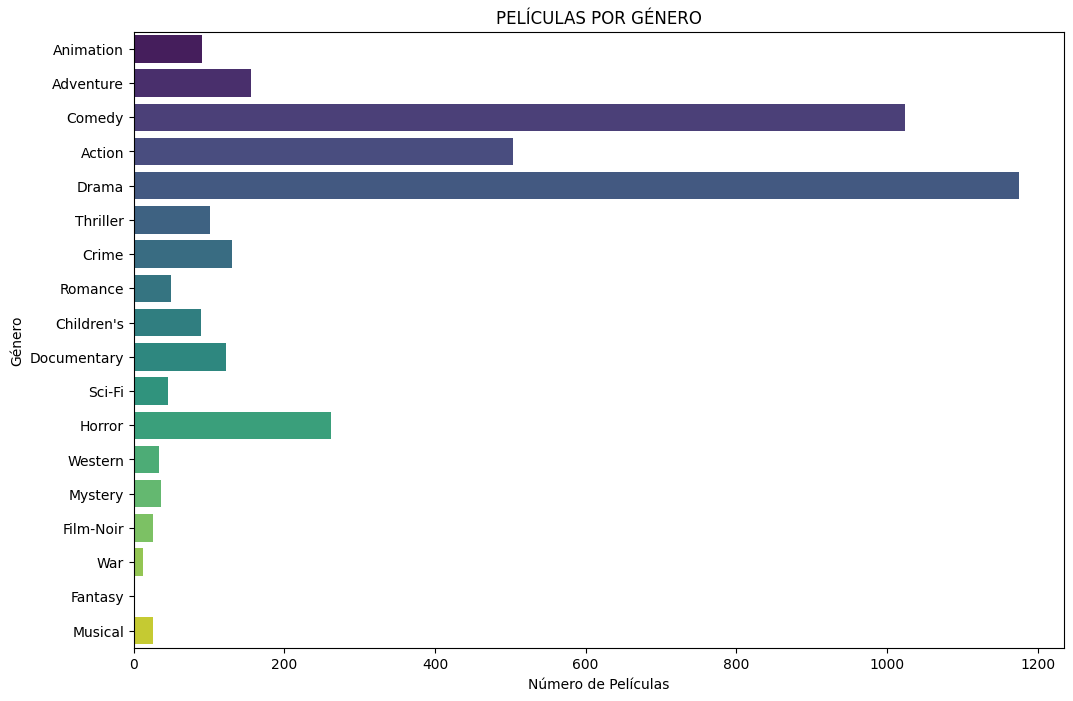

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(data=movies_final, y='Genero_0', palette='viridis', hue='Genero_0', dodge=False)
# Con hue='Genero_0 le estoy indicando que el color se basa en la columna Genero_0 
# Con dodge=False se organizan las barras de forma estética, sin separarse.
# (Esto no es necesario, pero si no las pongo me dau una alarma) 

# Configurar etiquetas y título
plt.xlabel('Número de Películas')
plt.ylabel('Género')
plt.title('PELÍCULAS POR GÉNERO')

# Mostrar el gráfico
plt.show()

### MOSTRAR EN UN HISTOGRAMA COMO HA EVOLUCIONADO EL NÚMERO DE PRODUCIONES EN EL TIEMPO

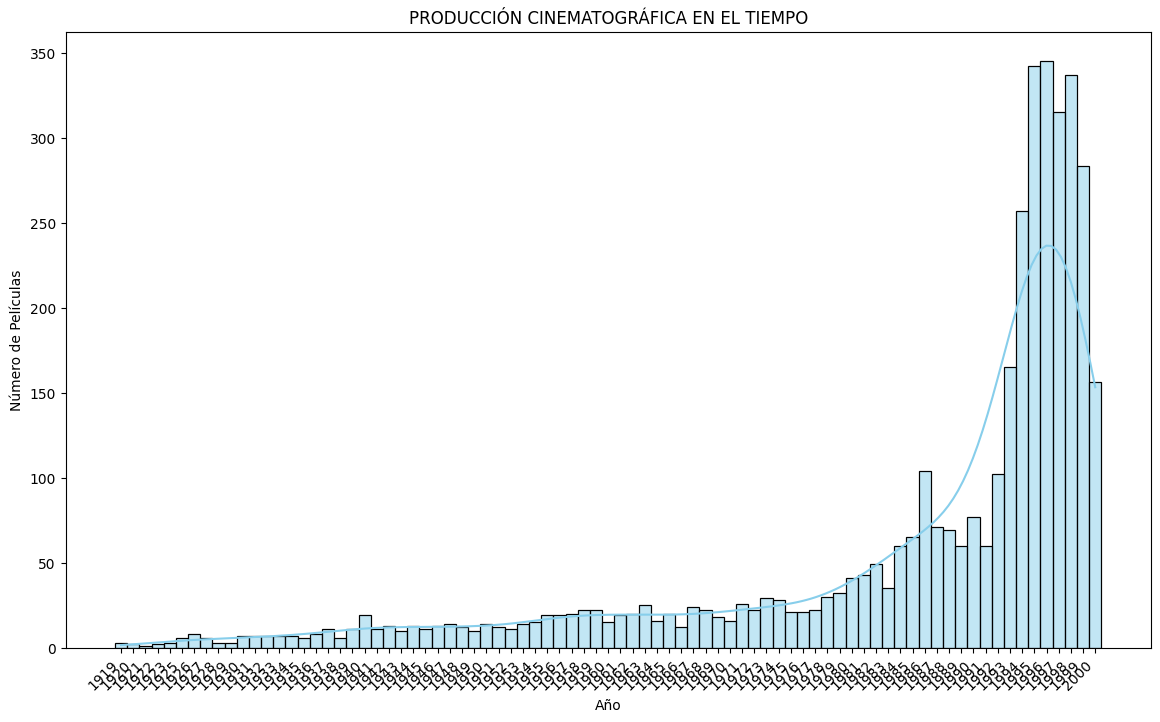

In [89]:
# Ordeno los datos por la columna 'Año', porque si no los años me aparecen desordenados
movies_final_ascendente = movies_final.sort_values('Año')

# Creo el histograma
plt.figure(figsize=(14, 8))
sns.histplot(data=movies_final_ascendente, x='Año', bins=30, kde=True, color='skyblue')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.title('PRODUCCIÓN CINEMATOGRÁFICA EN EL TIEMPO')

plt.xticks(rotation=45, ha='right')
# Rotar la etiqueta de los años en el eje x para mejor legibilidad

plt.show()

### COMPARAR LA EVOLUCIÓN EN EL TIEMPO DE LOS GÉNEROS  DRAMA, COMEDIA Y BÉLICO

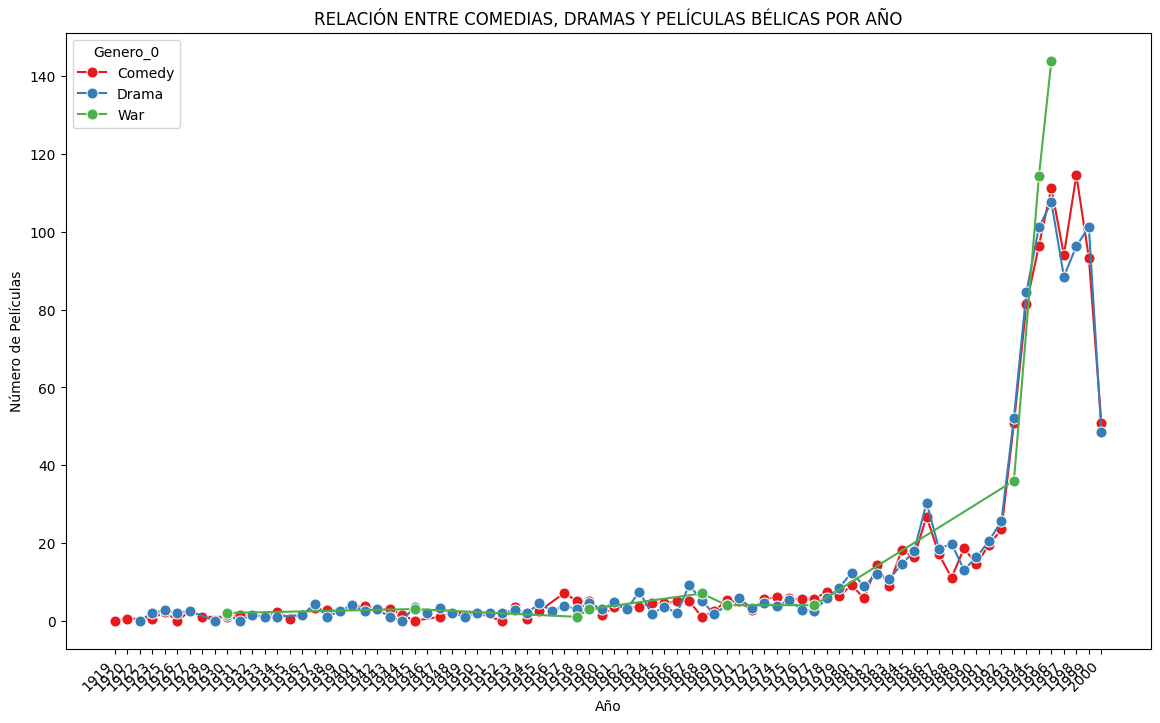

In [92]:
# Filtro las pelis de los géneros Drama y Comedy
drama_comedy_war = movies_final[movies_final['Genero_0'].isin(['Drama', 'Comedy', 'War'])]
# Con .isin(['Drama', 'Comedy', 'Horror']) estoy seleccionando esos géneros de la columna Genero_=

# Ordeno por el año para que no me muestre los años desordenados
drama_comedy_war_ascendente = drama_comedy_war.sort_values('Año')

# Creo un gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=drama_comedy_war_ascendente, x='Año', y=drama_comedy_war_ascendente.groupby('Año').cumcount(), 
             hue='Genero_0', marker='o', markersize=8, palette='Set1', errorbar=None)

plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.title('RELACIÓN ENTRE COMEDIAS, DRAMAS Y PELÍCULAS BÉLICAS POR AÑO')


plt.xticks(rotation=45, ha='right')
# Rotar la etiqueta de los años en el eje x para mejor legibilidad

plt.show()